<a href="https://colab.research.google.com/github/jjrcamilo/modelo_preditivo/blob/main/Modelo_Preditivo_Custos_Medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alunos
* Josenildo Camilo Junior RM357563
* Rogério Rocamora - RM 357764



# Problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde


# **Analise Exploratória dos Dados**


## **Base de Dados**
Para esse estudo foi utilizado a base de dados de seguro do Kaggle.

link: https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [ ]:
dados = pd.read_csv('seguro/insurance.csv')

In [ ]:
dados.shape

(1338, 7)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Alterados os dados para portugues**

 Alterado nome das colunas para *portugues* e analisando conhecendo os dados

 Para facilitar nosso a apresentação dos dados e nosso entendimento iremos fazer a tradução da colunas conforme abaixo:

*   age -> idade  | idade dos segurados
*   sex -> gênero | (masculino ou feminino)
*   bmi -> imc | Índice de Massa Corpórea
*   children -> filhos | quantidade de filhos ( 0 à 5)
*   smoker -> fumante  | Se é fumante ( sim ou não)
*   region ->  região  | região do assegurado
*   charges -> custo   | custo do assegurado

In [ ]:
dados.columns = ['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região', 'custo']
dados = dados.replace({'yes': 'sim', 'no': 'não','female': 'feminino', 'male': 'masculino',
                       'southwest':'sudoeste','southeast': 'sudeste','northwest': 'noroeste', 'northeast': 'nordeste'})

In [ ]:
df_t = dados.groupby(['gênero','fumante','região']).size().reset_index(name='Quantidade')
print(df_t)

       gênero fumante    região  Quantidade
0    feminino     não  nordeste         132
1    feminino     não  noroeste         135
2    feminino     não   sudeste         139
3    feminino     não  sudoeste         141
4    feminino     sim  nordeste          29
5    feminino     sim  noroeste          29
6    feminino     sim   sudeste          36
7    feminino     sim  sudoeste          21
8   masculino     não  nordeste         125
9   masculino     não  noroeste         132
10  masculino     não   sudeste         134
11  masculino     não  sudoeste         126
12  masculino     sim  nordeste          38
13  masculino     sim  noroeste          29
14  masculino     sim   sudeste          55
15  masculino     sim  sudoeste          37


## **Distribuição dos dados**
Podemos observar que o conjuntos dos dados consiste em 1338 entradas e 7 caracteristicas sendo que das 7 caracteristica 3 são categoricas e 4 númericas.



In [ ]:
dados.describe()

,idade,imc,filhos,custo
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Em uma primeira analise com comando describe, podemos analisar os seguintes itens

1.   A idade  minima, media e maximo dos segurados é de 18, 39 e 64 anos respectivamente e com um desvio padrão de 14.04, que indica um grau amplo de variação da idade no conjunto de dados.
2.   O IMC  minimo, media e maximo dos segurados é 15.96, 30.66 e 53.13 com um desvio padrão de 6.09,  que indica um grau moderado de variação do imc no conjunto de dados.  
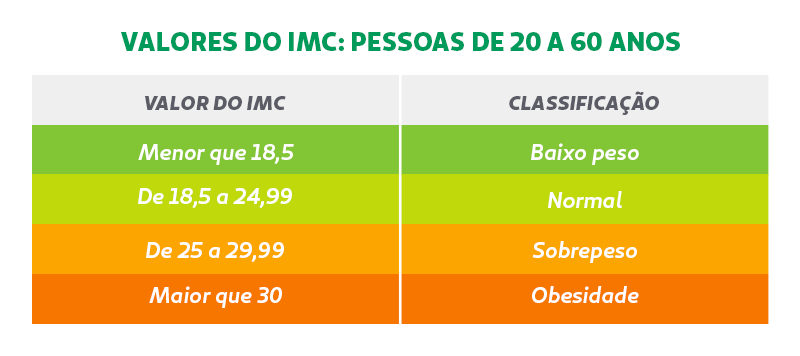

3.  Filhos minimo, media e maximo dos segurados é 0, 1 e 5 com um desvio padrão de 1.2, que pode indicar que os segurados tende a ter um ou mais filhos ou nenhum filho.
4.  Custo minimo, medio e maximo dos segurados é 1121, 13270 e 63770 com um desvio padrão de 12110, que indica que um grau alto de variação do custo podendo ter possivel outlier .  








## **Analise Variaveis Númericas**

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'custo'}>]], dtype=object)

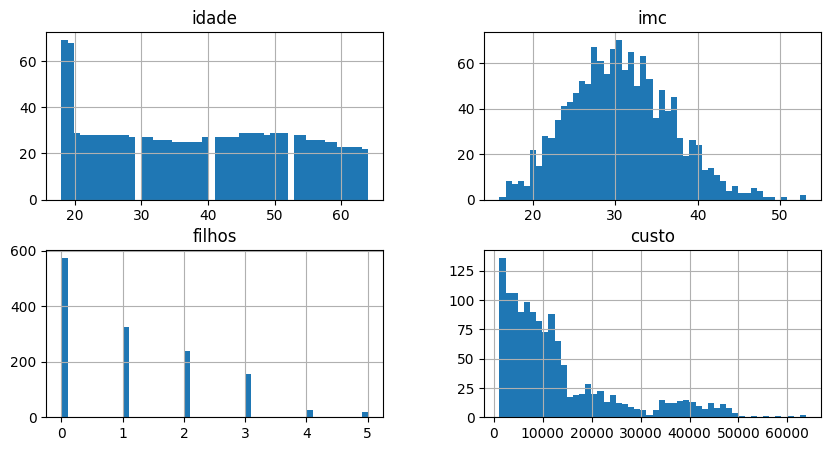

In [ ]:
dados.hist(bins=50, figsize=(10,5))

Analise das variaveis númericas

 O histograma apresenta

*   idade -   uma concentração maior entre 18 a 20 anos. Entre 20 a 64 a distruição se mantem em uma mesma proporção

*   imc -    uma concentração no maior no centro, indicado um maior indice de sobrepeso dos segurados.

*   filhos - o numero de segurados sem filhos é maior.

*   custo -    uma concentração maior nos intervalos de custo mais baixo. No valores mais altos podemos considerar casos de exceção como doenças, planos diferenciados ou até mesmo fraude.




## **Analise Variaveis Categoricas**

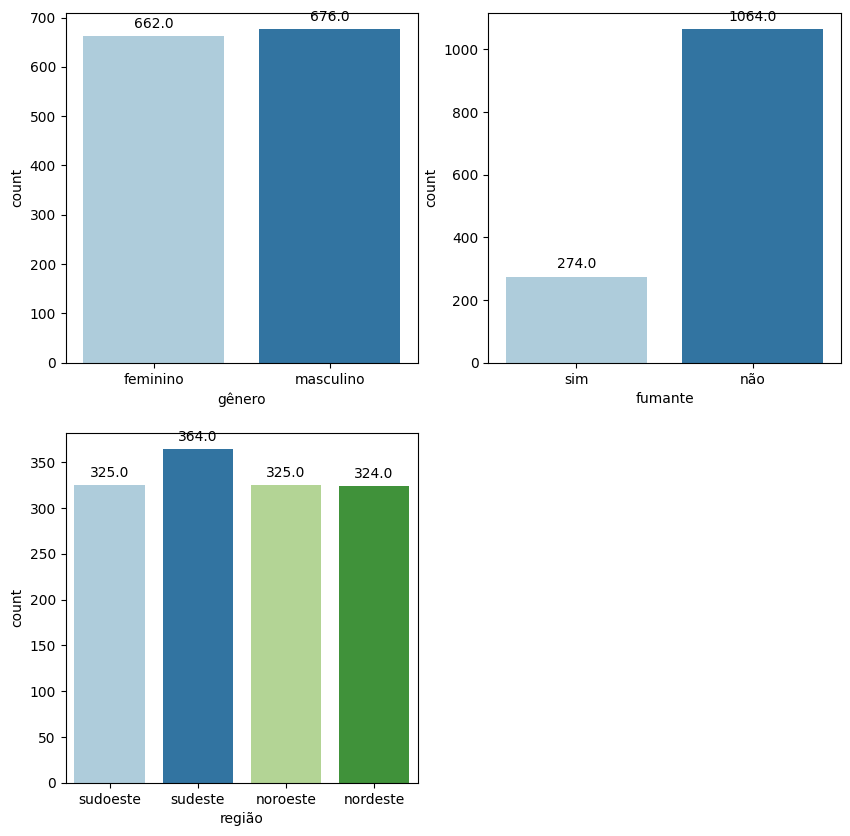

In [ ]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização


# GENERO
plt.subplot(2,2,1)
barplot1 = sns.countplot(x = "gênero" , hue='gênero',palette = "Paired", data = dados) #Distribuição por genero
# Adicionando os valores no gráfico
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
# FUMANTE
plt.subplot(2,2,2)
barplot2 = sns.countplot(x = "fumante", hue='fumante', palette = "Paired", data = dados) #Distribuição por fumante
# Adicionando os valores no gráfico
for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
# REGIÃO
plt.subplot(2,2,3)
barplot3 = sns.countplot(x = "região", hue='região',palette = "Paired", data = dados) #Distribuição por região
# Adicionando os valores no gráfico
for p in barplot3.patches:
    barplot3.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')




Analise variaveis categoricas

* Gênero  - A distruição é equilibrada entre masculino e feminino

* Fumante - A propoção de não fumante (1076) é maior que fumante (274). O que pode implicar no custo do seguro pois o risco de saúde é menor.

* Região - A distruição é equilibrada entre as regiões.


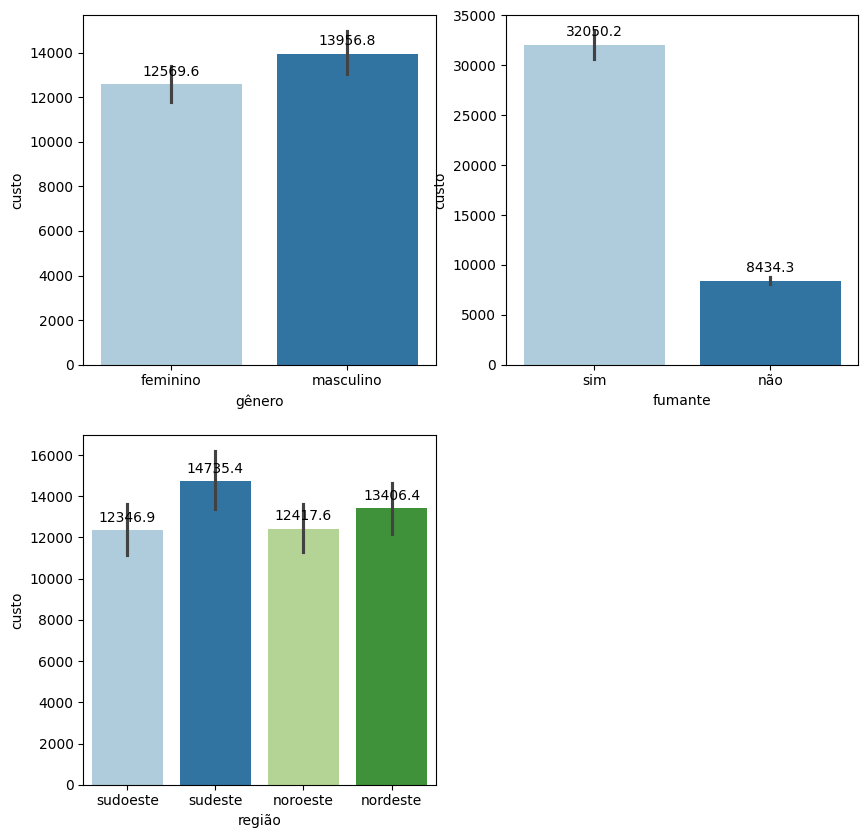

In [ ]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

# GENERO POR CUSTO
plt.subplot(2,2,1)
barplot = sns.barplot(x='gênero', y='custo', data=dados, hue='gênero', palette='Paired', legend=False) #custo do seguro por genero
# Adicionando os valores no gráfico
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
# CUSTO POR FUMANTE
plt.subplot(2,2,2)
barplot = sns.barplot(x='fumante', y='custo', data=dados, hue='fumante', palette='Paired', legend=False) #custo do seguro por genero
# Adicionando os valores no gráfico
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
# CUSTO POR REGIÃO
plt.subplot(2,2,3)
barplot = sns.barplot(x='região', y='custo', data=dados, hue='região', palette='Paired', legend=False) #custo do seguro por genero
# Adicionando os valores no gráfico
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

Informações sobre Custo por:


* Gênero  - Ambos parece bem ditribuidos o que mostra que não é significante para o custo.

* Fumante - Aqui temos uma diferença bem grande, aonde os fumantes tem sim um custo maior.

* Região  - Também mostra que está bem distribuido não mostrando grande diferença.



## **Analise Outlier**

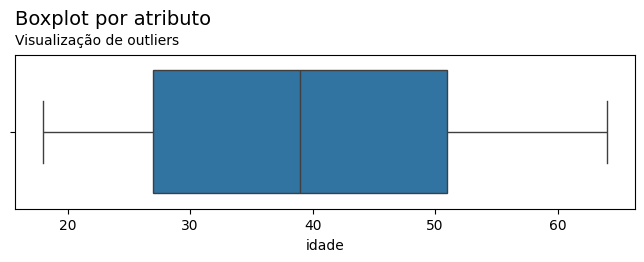

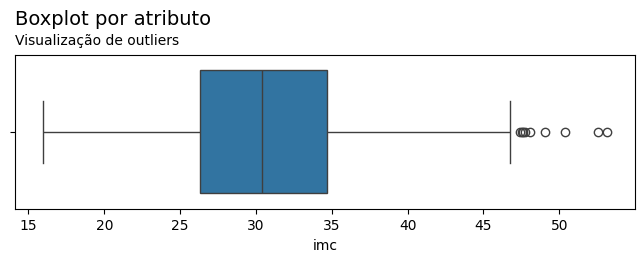

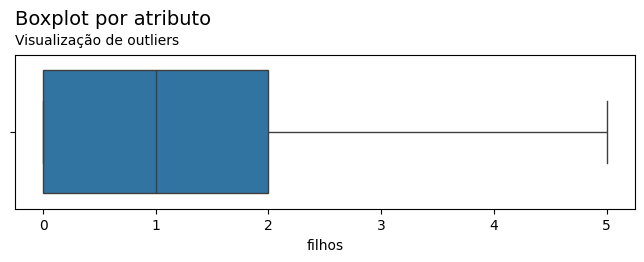

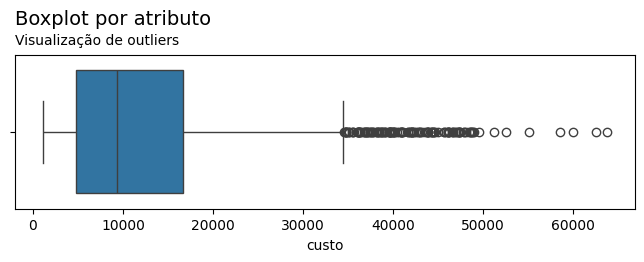

In [ ]:
# gerando o gráfico
x_out = dados.drop(['gênero','fumante','região'],axis = 1)
for i in x_out.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(x = i, data = x_out )
    plt.xlabel(i)

# adicionando títulos
    plt.title("Boxplot por atributo", fontsize=14, x=0, y=1.145, loc="left")
    plt.suptitle("Visualização de outliers",  fontsize=10, x=0.125, y=0.99, ha="left");

# plotando o gráfico
    plt.show()

justificar a retirada dos outlier acima de 15

## Correlação

<Axes: >

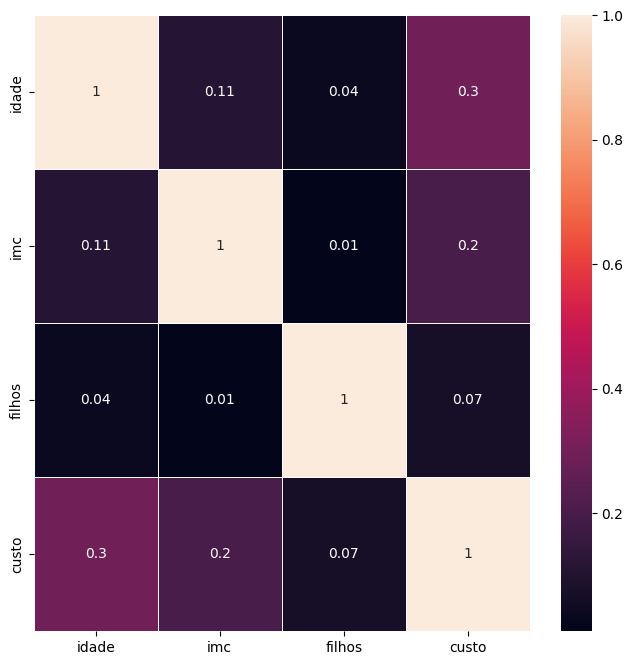

In [ ]:
correlation_matrix = dados[['idade','imc','filhos','custo']].corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
correlation_matrix["custo"].sort_values(ascending=False)

,custo
custo,1.00
idade,0.30
imc,0.20
filhos,0.07


## **Dispersão**

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>,
        <Axes: xlabel='filhos', ylabel='idade'>,
        <Axes: xlabel='custo', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='imc'>,
        <Axes: xlabel='imc', ylabel='imc'>,
        <Axes: xlabel='filhos', ylabel='imc'>,
        <Axes: xlabel='custo', ylabel='imc'>],
       [<Axes: xlabel='idade', ylabel='filhos'>,
        <Axes: xlabel='imc', ylabel='filhos'>,
        <Axes: xlabel='filhos', ylabel='filhos'>,
        <Axes: xlabel='custo', ylabel='filhos'>],
       [<Axes: xlabel='idade', ylabel='custo'>,
        <Axes: xlabel='imc', ylabel='custo'>,
        <Axes: xlabel='filhos', ylabel='custo'>,
        <Axes: xlabel='custo', ylabel='custo'>]], dtype=object)

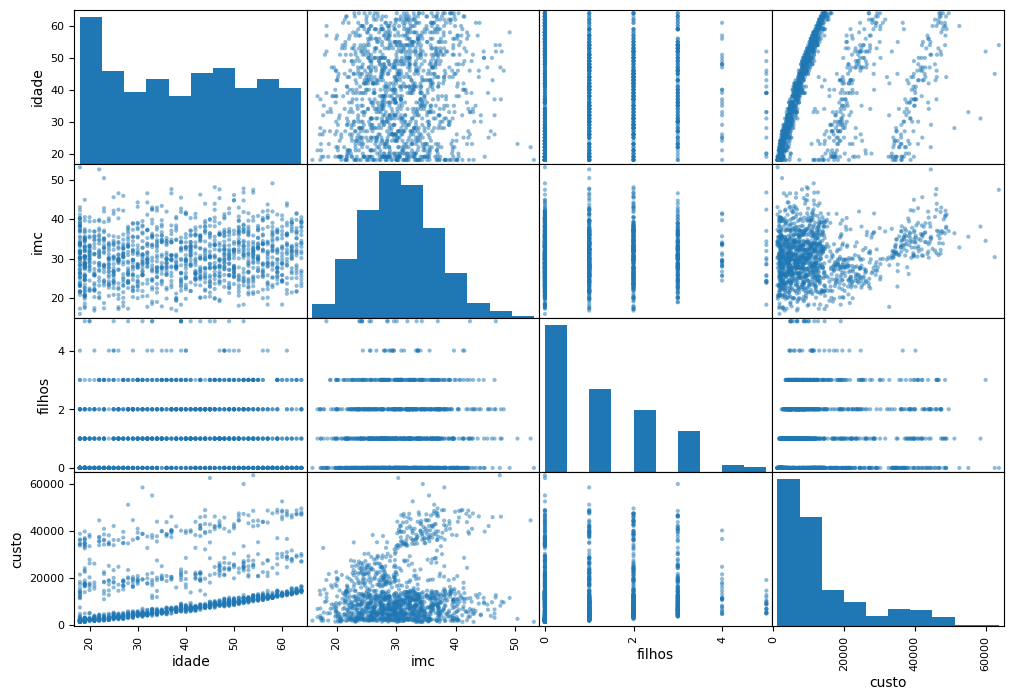

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(dados, figsize=(12, 8))

Existe uma maior correlação da idade com o custo em segundo é o imc e a correlação mais baixo são os filhos. Sugere que pessoas mais velhas tendem a ter um custo mais alto do seguro.


# Pré processamentos dos Dados


## **Limpeza de dados**

In [ ]:
dados.isnull().sum()

,0
idade,0
gênero,0
imc,0
filhos,0
fumante,0
região,0
custo,0


  **Valores Nulos**
O dataset não possui valores nulos, por esse motivo não é necessário nenhuma ação.

In [ ]:
print(dados.duplicated().sum())

1


 **Valores Duplicados**

O dataset possui um valor duplicado, por esse motivo foi removido dataset.

In [ ]:
# Remover duplicatas
dados = dados.drop_duplicates()

print(dados.duplicated().sum())

0


## Outlier


In [ ]:
index = dados[(dados['custo'] > 16000)].index
dados.drop(index, inplace=True)


In [ ]:
dados.shape

(991, 7)

## **Tratamento das variaveis Categoricas**


---



In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    991 non-null    int64  
 1   gênero   991 non-null    object 
 2   imc      991 non-null    float64
 3   filhos   991 non-null    int64  
 4   fumante  991 non-null    object 
 5   região   991 non-null    object 
 6   custo    991 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 61.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dados['gênero'] = label_encoder.fit_transform(dados['gênero'])
dados['fumante'] = label_encoder.fit_transform(dados['fumante'])

In [ ]:
# Usando get_dummies para criar variáveis dummy para a coluna 'Cidade'
df_dummies = pd.get_dummies(dados['região'], prefix='região')

# Concatenando as variáveis dummy ao DataFrame original
df = pd.concat([dados.drop('região', axis=1), df_dummies], axis=1)

In [ ]:
df

,idade,gênero,imc,filhos,fumante,custo,região_nordeste,região_noroeste,região_sudeste,região_sudoeste
1,18,1,33.77,1,0,1725.5523,False,False,True,False
2,28,1,33.00,3,0,4449.4620,False,False,True,False
4,32,1,28.88,0,0,3866.8552,False,True,False,False
5,31,0,25.74,0,0,3756.6216,False,False,True,False
6,46,0,33.44,1,0,8240.5896,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1332,52,0,44.70,3,0,11411.6850,False,False,False,True
1333,50,1,30.97,3,0,10600.5483,False,True,False,False
1334,18,0,31.92,0,0,2205.9808,True,False,False,False
1335,18,0,36.85,0,0,1629.8335,False,False,True,False


<Axes: >

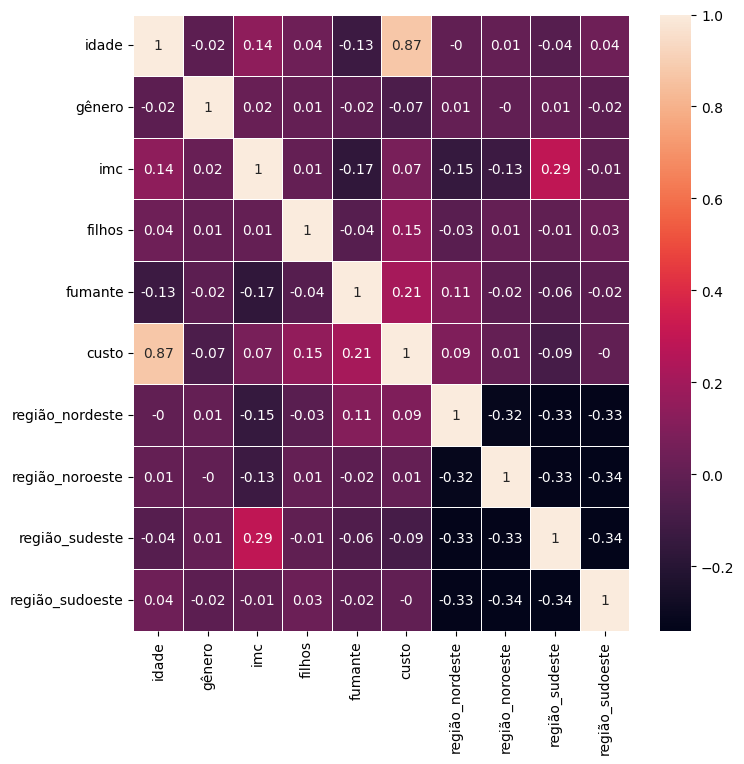

In [ ]:
correlation_matrix2 = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix2, annot=True, linewidths=.5, ax=ax)

In [ ]:
correlation_matrix2['custo'].sort_values(ascending=False)

,custo
custo,1.00
idade,0.87
fumante,0.21
filhos,0.15
região_nordeste,0.09
imc,0.07
região_noroeste,0.01
região_sudoeste,-0.00
gênero,-0.07
região_sudeste,-0.09


# Modelagem

## **Treinamento**


In [ ]:
x = df.drop(columns=['custo'], axis = 1) # Variáveis características
y = df['custo'] # O que eu quero prever. (Target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 #20% para teste e 80% de treino

## **Normalização**

***Optamos em fazer a normalização dos dados, pois os dados possuem escalas diferentes exemplo (ano e custo)***

In [ ]:
# normalizando os dados
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)
scaler.fit(X_train)
x_train_normalizado = scaler.transform(X_train)
x_test_normalizado  = scaler.transform(X_test)

In [ ]:
x_train_normalizado

array([[0.39130435, 1.        , 0.3118106 , ..., 0.        , 0.        ,
        0.        ],
       [0.2826087 , 1.        , 0.11945117, ..., 0.        , 0.        ,
        1.        ],
       [0.2826087 , 1.        , 0.33736885, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54347826, 0.        , 0.50094162, ..., 1.        , 0.        ,
        0.        ],
       [0.43478261, 0.        , 0.39628733, ..., 0.        , 1.        ,
        0.        ],
       [0.23913043, 0.        , 0.61528114, ..., 0.        , 1.        ,
        0.        ]])

## **Função para Validação**

In [ ]:
# Avaliando o desempenho do modelo
def calculate_perfomance(labels,predictions):
    erro_medio_quadratico = mean_squared_error(labels, predictions)
    erro_absoluto_medio = mean_absolute_error(labels, predictions)
    r_quadrado = r2_score(labels, predictions)
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
    print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
    print(f'R² (coeficiente de determinação): {r_quadrado}')
    print(f"MAPE: {mape:.2f}%")
    # Visualizando as previsões
    plt.scatter(labels, predictions, alpha=0.5)
    plt.plot([min(labels), max(labels)], [min(labels), max(labels)], linestyle='--', color='red', label="Real")
    plt.xlabel('Real')
    plt.ylabel('Previsto')
    plt.title('Previsões do Modelo de Regressão Preditivo')
    plt.legend()
    plt.show()



## **Modelo Utilizados**

### **Regressão Linear**

In [ ]:
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x_train_normalizado, y_train)

LinearRegression()

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred_lr = modelo.predict(x_test_normalizado)

Erro Médio Quadrático: 2182839.3535559024
Erro Absoluto Médio: 705.9513623754148
R² (coeficiente de determinação): 0.8615459073283822
MAPE: 10.38%


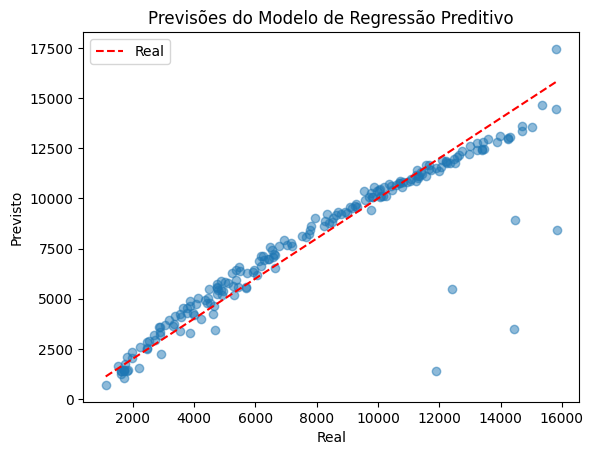

In [ ]:
 calculate_perfomance(labels=y_test, predictions=y_pred_lr)

### Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(x_train_normalizado, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Fazendo previsões no conjunto de teste
previsoes_dtr = model_dtr.predict(x_test_normalizado)

Erro Médio Quadrático: 4345091.473303057
Erro Absoluto Médio: 856.5455180847875
R² (coeficiente de determinação): 0.7243976307595232
MAPE: 13.78%


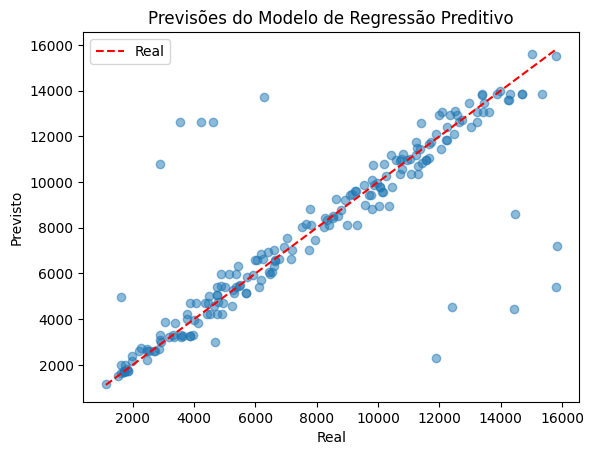

In [ ]:
calculate_perfomance(labels=y_test, predictions=previsoes_dtr)

### **XGBoost Regression**

Erro Médio Quadrático: 3022733.9039871073
Erro Absoluto Médio: 626.930508436911
R² (coeficiente de determinação): 0.8082727071130964
MAPE: 12.10%


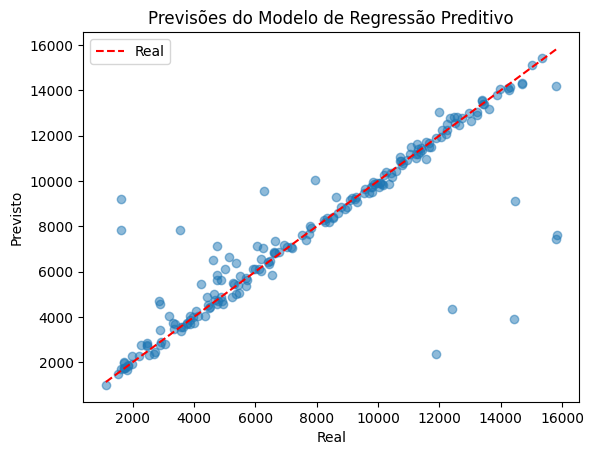

In [ ]:
# gerando a pipeline do modelo
model_XGB = XGBRegressor(random_state=42)

# Treinar o modelo
model_XGB.fit(x_train_normalizado, y_train)

# Fazer previsões
previsoes_XGB = model_XGB.predict(x_test_normalizado)

# Avaliar o modelo
perfomance = calculate_perfomance(labels=y_test, predictions=previsoes_XGB)

### **Random Forest Regressor**

Erro Médio Quadrático: 2825402.851006542
Erro Absoluto Médio: 713.4576431563397
R² (coeficiente de determinação): 0.8207891077597367
MAPE: 12.56%


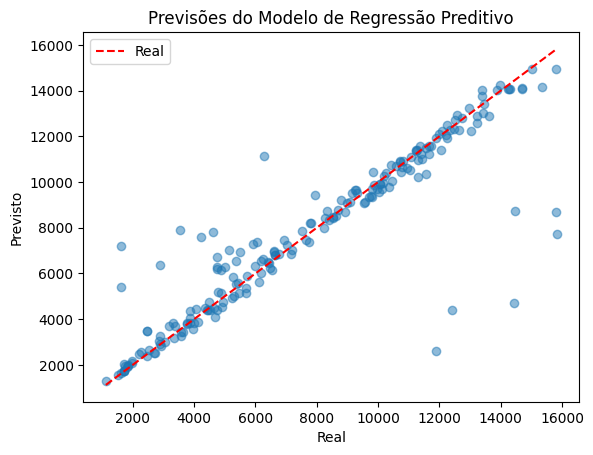

In [ ]:
# gerando a pipeline do modelo
model_RFR = RandomForestRegressor()

# Treinar o modelo
model_RFR.fit(x_train_normalizado, y_train)

# Fazer previsões
previsoes_RFR = model_RFR.predict(x_test_normalizado)

# Avaliar o modelo
calculate_perfomance(labels=y_test, predictions=previsoes_RFR)

### **Gradient Boosting Regressor**

Erro Médio Quadrático: 2414841.933679784
Erro Absoluto Médio: 610.7148276188474
R² (coeficiente de determinação): 0.8468303458390773
MAPE: 9.79%


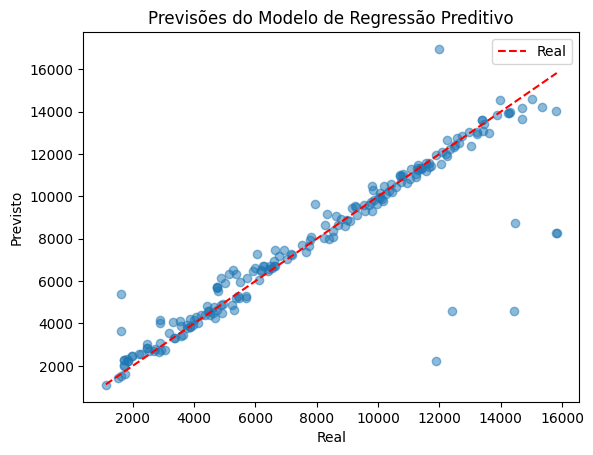

In [ ]:
# gerando a pipeline do modelo
model_GBR = GradientBoostingRegressor()

# Treinar o modelo
model_GBR.fit(x_train_normalizado, y_train)

# Fazer previsões
previsoes_GBR = model_GBR.predict(x_test_normalizado)

# Avaliar o modelo
calculate_perfomance(labels=y_test, predictions=previsoes_GBR)

#**Validação Cruzada**




In [ ]:
def AplicaValidacaoCruzada(x_axis, y_axis):

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score,cross_validate
  from sklearn.model_selection import KFold
  from sklearn.metrics import make_scorer, mean_absolute_percentage_error

  # Configuração de KFold.
  kfold  = KFold(n_splits=10, shuffle=True)

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos
  # Linear Regressor
  LR = LinearRegression()
  LR.fit(x, y)

  # Decision Tree Regressor
  DTR = DecisionTreeRegressor(max_depth=10)
  DTR.fit(x, y)

  # Gradient Boosting Regressor
  GBR = GradientBoostingRegressor()
  GBR.fit(x, y)

  # Random Forest Regressor
  RFR = RandomForestRegressor()
  RFR.fit(x, y)

  # XGB Regressor
  XGB = XGBRegressor(random_state=42)
  XGB.fit(x, y)

  # Definindo os scorers (métricas) que serão usados
  scoring = {
      'r2': make_scorer(r2_score),
      'mape': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
  }

  # Applyes KFold to models.
  lr_result  = cross_validate (LR, x, y, cv = kfold, scoring=scoring, return_train_score=False)
  dtr_result = cross_validate (DTR, x, y, cv = kfold, scoring=scoring, return_train_score=False)
  gbr_result = cross_validate (GBR, x, y, cv = kfold, scoring=scoring, return_train_score=False)
  rfr_result = cross_validate (RFR, x, y, cv = kfold, scoring=scoring, return_train_score=False)
  xgb_result = cross_validate (XGB, x, y, cv = kfold, scoring=scoring, return_train_score=False)


  # Como make_scorer com greater_is_better=False retorna valores negativos (para que valores menores sejam melhores),
  # Multiplicamos por -100 para obter o MAPE como um valor percentual positivo



  # Creates a dictionary to store Linear Models.
  dic_models = {
    "LR_r2":  lr_result['test_r2'].mean(),
    "DTR_r2": dtr_result['test_r2'].mean(),
    "GBR_r2": gbr_result['test_r2'].mean(),
    "RFR_r2": rfr_result['test_r2'].mean(),
    "XGB_r2": xgb_result['test_r2'].mean(),
  }
  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  print("Linear Regressor (R^2): {0} - MAPE: {1} \nDecision Tree Regressor (R^2): {2} - MAPE: {3} \nGradient Boosting Regressor (R^2): {4}  - MAPE:{5} \nRandom Forest Regressor (R^2): {6}  - MAPE: {7} \nXGB Regressor (R^2): {8}  - MAPE:{9}".
        format(round( 100*lr_result['test_r2'].mean(),2), round( -100* lr_result['test_mape'].mean(),2),
               round( 100*dtr_result['test_r2'].mean(),2), round( -100* dtr_result['test_mape'].mean(),2),
               round( 100*gbr_result['test_r2'].mean(),2), round( -100* gbr_result['test_mape'].mean(),2),
               round( 100*rfr_result['test_r2'].mean(),2), round( -100* rfr_result['test_mape'].mean(),2),
               round( 100*xgb_result['test_r2'].mean(),2),  round(-100* xgb_result['test_mape'].mean(),2)) )


  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, round( 100*dic_models[melhorModelo],2)))


In [ ]:
AplicaValidacaoCruzada(x_train_normalizado, y_train)

Linear Regressor (R^2): 89.13 - MAPE: 10.37 
Decision Tree Regressor (R^2): 83.01 - MAPE: 12.24 
Gradient Boosting Regressor (R^2): 90.49  - MAPE:9.6 
Random Forest Regressor (R^2): 90.58  - MAPE: 8.94 
XGB Regressor (R^2): 85.56  - MAPE:11.89
O melhor modelo é : RFR_r2 com o valor: 90.58


#**Considerações Finais**

De acordo com o  nosso modelo o que apresenta um aumento significativo nos gastos foram idade e fumante, regiao e filhos não apresenta relevancia no aumento dos custos.

Claro que precisaria ter mais dados para confirmar nossas hipoteses
